# EDA 

In [6]:
import pandas as pd 
import numpy as np 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


 -   id - a unique identifier for each trip
 -   vendor_id - a code indicating the provider associated with the trip record
 -   pickup_datetime - date and time when the meter was engaged
 -   dropoff_datetime - date and time when the meter was disengaged
 -   passenger_count - the number of passengers in the vehicle (driver entered value)
 -   pickup_longitude - the longitude where the meter was engaged
 -   pickup_latitude - the latitude where the meter was engaged
 -   dropoff_longitude - the longitude where the meter was disengaged
 -   dropoff_latitude - the latitude where the meter was disengaged
 -   store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
 -   trip_duration - duration of the trip in seconds


In [7]:
train_path = "../data/train.csv"
test_path = "../data/test.csv"

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print(f"Train shape: {train.shape}, Test shape: {test.shape}")
train.head()

Train shape: (1458644, 11), Test shape: (625134, 9)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [13]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [17]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Text(0.5, 1.0, 'Trips by Hour of Day')

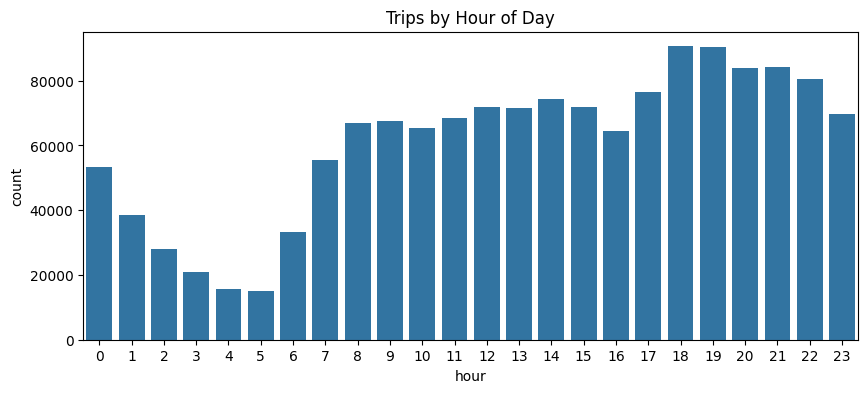

In [16]:
# Convert to datetime
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['hour'] = train['pickup_datetime'].dt.hour
train['day_of_week'] = train['pickup_datetime'].dt.dayofweek

# Plot trips by hour
plt.figure(figsize=(10, 4))
sns.countplot(x='hour', data=train)
plt.title("Trips by Hour of Day")

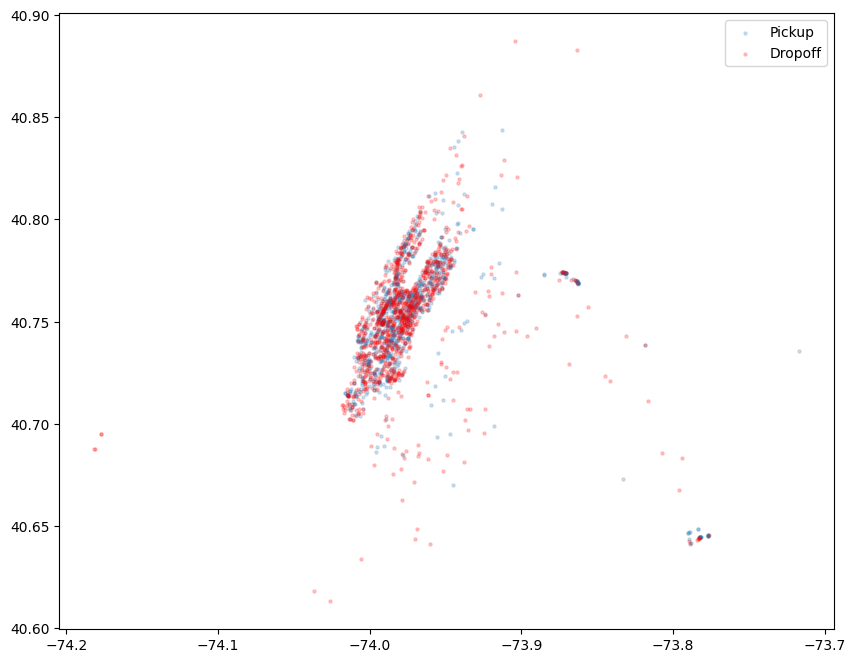

In [ ]:
# Plot pickup/dropoff clusters (sample for speed)
sample = train.sample(1000)
plt.figure(figsize=(10, 8))
plt.scatter(sample['pickup_longitude'], sample['pickup_latitude'], 
            alpha=0.2, s=5, label='Pickup')
plt.scatter(sample['dropoff_longitude'], sample['dropoff_latitude'], 
            alpha=0.2, s=5, c='red', label='Dropoff')
plt.legend()

Text(0.5, 1.0, 'Log-Trip Duration Distribution')

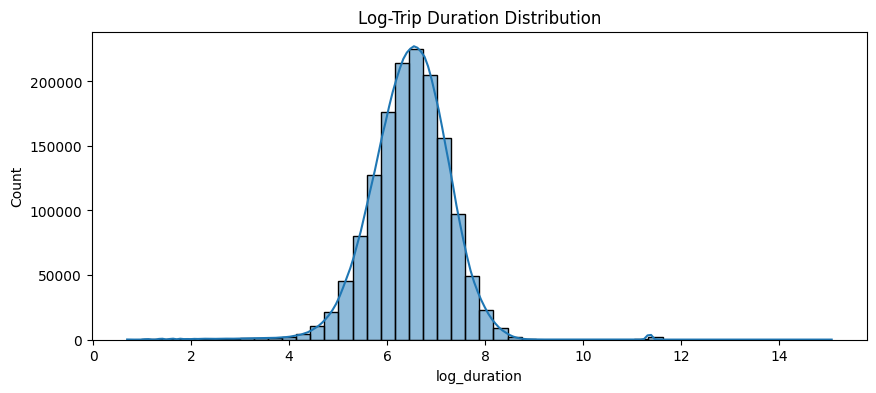

In [18]:
# Log-transform for skewed targets
train['log_duration'] = np.log(train['trip_duration'] + 1)

# Plot distribution
plt.figure(figsize=(10, 4))
sns.histplot(train['log_duration'], bins=50, kde=True)
plt.title("Log-Trip Duration Distribution")

<Axes: xlabel='trip_duration'>

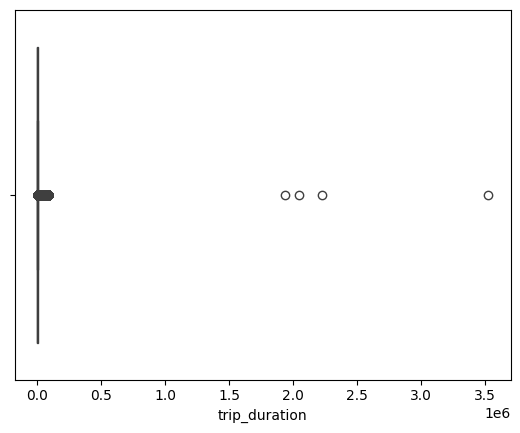

In [25]:
sns.boxplot(x=train['trip_duration'])

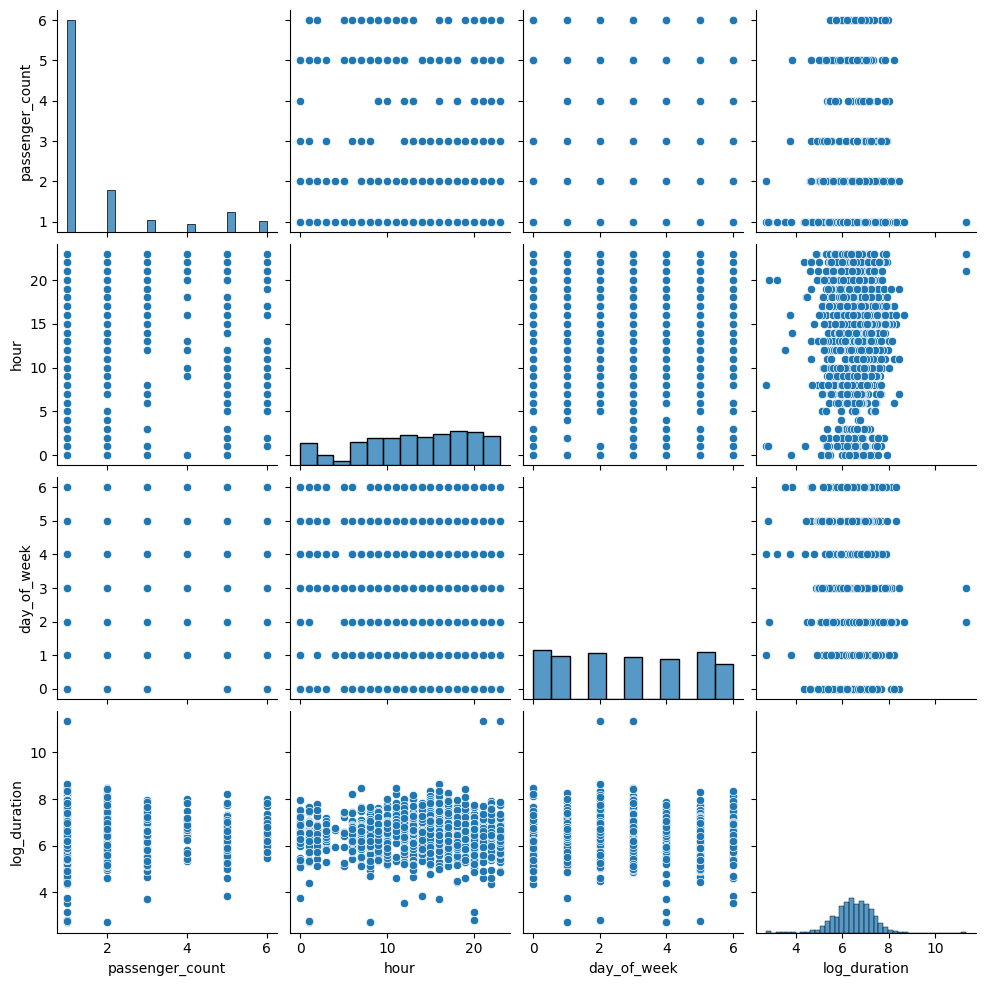

In [19]:
# Numeric features vs. target
numeric_features = ['passenger_count', 'hour', 'day_of_week']
sns.pairplot(train[numeric_features + ['log_duration']].sample(1000));

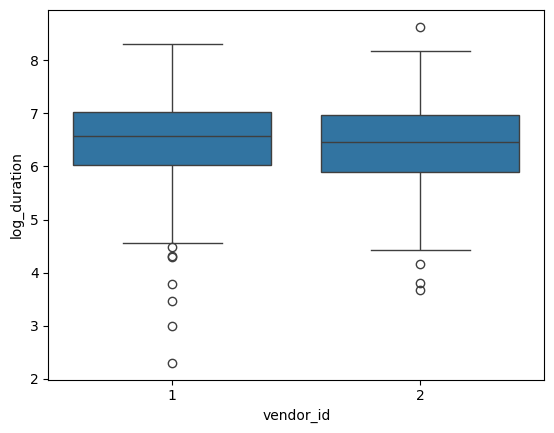

In [ ]:
# Vendor impact on duration
sns.boxplot(x='vendor_id', y='log_duration', data=train.sample(1000))